In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [6]:
# Function to convert to milliseconds
def to_ms(val):
    if pd.isna(val):
        return None
    val = str(val).strip().lower()

    if val.endswith("ms"):
        return float(val.replace("ms", "").strip())
    elif val.endswith("µs") or val.endswith("us"):  # handle µs or us
        return float(val.replace("µs", "").replace("us", "").strip()) / 1000.0
    elif val.endswith("s"):
        return float(val.replace("s", "").strip()) * 1000.0
    else:
        # assume it's already ms
        return float(val)


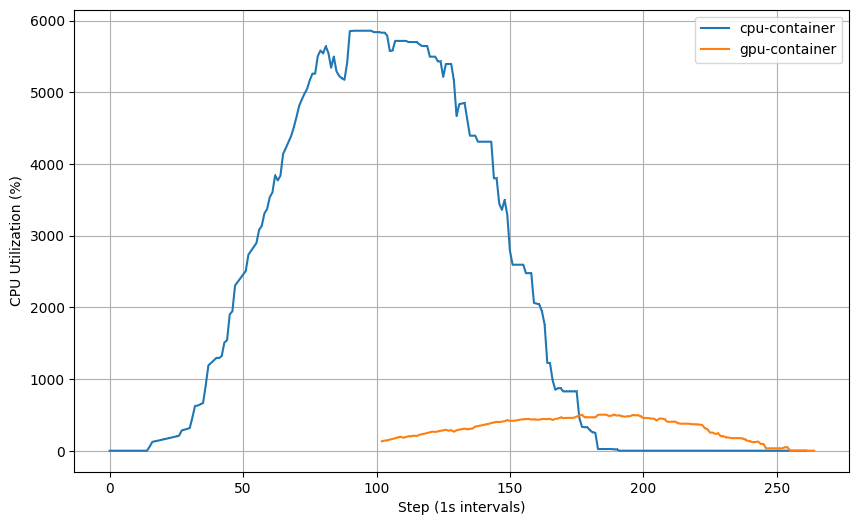

In [16]:
# CPU Utilization Auto

# Load all CSV files
# Load CSVs
csv_files_auto_cpu = glob.glob("./data/auto/*resources.csv")

dfs_auto_cpu = []
for file in csv_files_auto_cpu:
    df = pd.read_csv(file, usecols=["cpu-cpu_user-container", "cpu-gpu_user-container"])
    df["cpu-cpu_user-container"] = df["cpu-cpu_user-container"].apply(to_ms)
    df["cpu-gpu_user-container"] = df["cpu-gpu_user-container"].apply(to_ms)
    dfs_auto_cpu.append(df)

# Combine into one DataFrame
combined_auto = pd.concat(dfs_auto_cpu, axis=1)

means_auto_cpu_container = combined_auto["cpu-cpu_user-container"].mean(axis=1)
means_auto_gpu_container = combined_auto["cpu-gpu_user-container"].mean(axis=1)

plt.figure(figsize=(10,6))

plt.plot(means_auto_cpu_container.index, means_auto_cpu_container, marker=",", label="cpu-container")
plt.plot(means_auto_gpu_container.index, means_auto_gpu_container, marker=",", label="gpu-container")

plt.xlabel("Step (1s intervals)")
plt.ylabel("CPU Utilization (%)")
plt.legend()
plt.grid(True)
plt.show()



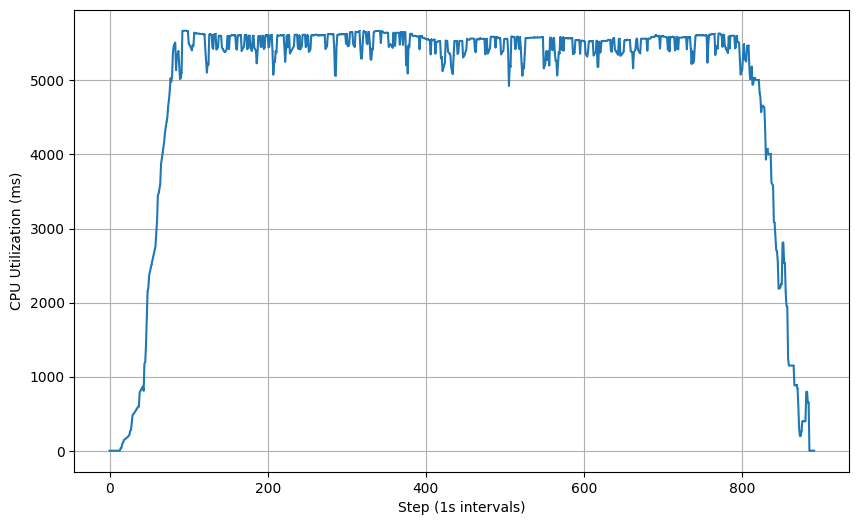

In [7]:
# CPU Utilization CPU mode

# Load all CSV files
csv_files_cpu = glob.glob("./data/cpu/*resources.csv")

# clean
dfs_cpu = []
for file in csv_files_cpu:
    df = pd.read_csv(file, usecols=["cpu_user-container"])
    df["cpu_user-container"] = df["cpu_user-container"].apply(to_ms)
    dfs_cpu.append(df)


combined_cpu = pd.concat(dfs_cpu, axis=1)
combined_cpu.fillna(0)

means_cpu = combined_cpu.mean(axis=1)

plt.figure(figsize=(10,6))

plt.plot(means_cpu.index, means_cpu, marker=",")

plt.xlabel("Step (1s intervals)")
plt.ylabel("CPU Utilization (ms)")
# plt.legend()
plt.grid(True)
plt.show()

0        0.439000
1        0.439000
2        0.439000
3        0.439000
4        0.439000
5        0.365000
6        0.430000
7        0.367000
8        0.359000
9        0.352000
10       0.345000
11       0.338000
12       0.331000
13       0.323000
14       0.316000
15       0.309000
16       0.302000
17       0.295000
18       0.288000
19       0.280000
20       0.273000
21       0.266000
22       0.170000
23       0.170000
24      68.609500
25      72.606500
26      94.402000
27     100.400000
28     105.731000
29     165.000000
30     171.600000
31     180.400000
32     188.800000
33     197.400000
34     206.000000
35     214.400000
36     223.000000
37     231.600000
38     240.000000
39     248.600000
40     256.800000
41     249.200000
42     277.400000
43     285.800000
44     294.600000
45     304.000000
46     312.400000
47     321.400000
48     329.800000
49     338.600000
50     347.200000
51     355.800000
52     364.600000
53     372.600000
54     381.200000
55     389

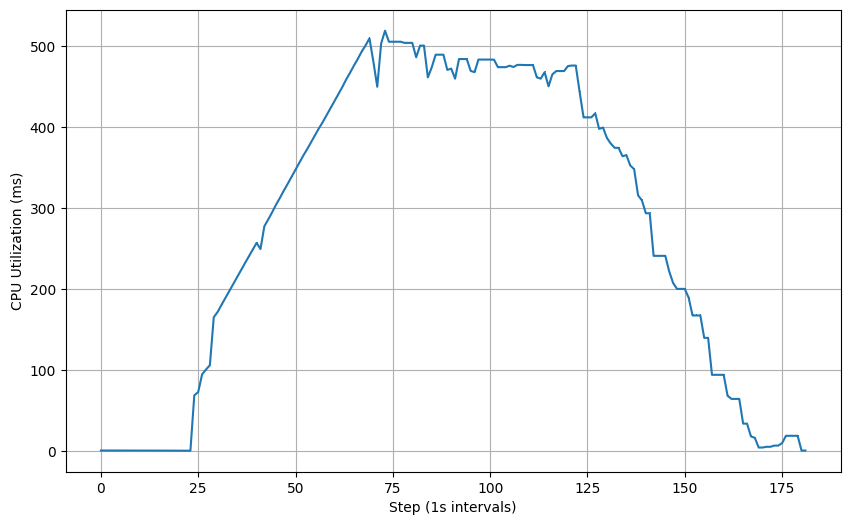

In [14]:
# CPU Utilization GPU mode

# Load all CSV files
csv_files_cpu = glob.glob("./data/gpu/*resources.csv")

# clean
dfs_cpu = []
for file in csv_files_cpu:
    df = pd.read_csv(file, usecols=["cpu_user-container"])
    df["cpu_user-container"] = df["cpu_user-container"].apply(to_ms)
    dfs_cpu.append(df)


combined_cpu = pd.concat(dfs_cpu, axis=1)
combined_cpu.fillna(0)

means_cpu = combined_cpu.mean(axis=1)

pd.set_option('display.max_rows', None)

plt.figure(figsize=(10,6))

# only between index 200 and 400
# means_cpu = means_cpu[25:75]

plt.plot(means_cpu.index, means_cpu, marker=",")

plt.xlabel("Step (1s intervals)")
plt.ylabel("CPU Utilization (ms)")
# plt.legend()
plt.grid(True)
plt.show()